<a href="https://colab.research.google.com/github/Alm3ida/calculo_numerico/blob/master/Convolu%C3%A7%C3%A3o_no_Tempo_Discreto_(LSTI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convolução de Sinais no Tempo Discreto (Discrete Time Convolution)**


---

## **Desafio:**

Implementar um código para a calcular numericamente a integral de convolução entre dois sinais. Os seguintes requisitos devem ser atendidos:

- O usuário do código deve especicar os sinais que serão convoluidos através de funções em arquivos diferentes.
- O usuário deve definir o intervalo de tempo para o cálculo da convolução.
- O resultado da convolução deve ser apresentado de forma gráca.



# **Convolução de Sinais no Tempo Discreto:**

O cálculo da convolução no tempo discreto por definição é:


$$
y[n] = x[n]*h[n] = \displaystyle\sum_{\tau = -\infty}^{\infty} x[\tau]h[n-\tau]
$$

## **Como utilizar?**

1. Crie um documento de texto (.txt), já com o nome da função que irá utilizar no código, como por exemplo, `sinal_1.txt`. Acesse os sinais de exemplo através deste [link](https://drive.google.com/drive/folders/1V5TXD6nTvpYQPEh4RC5DFDQxucu9xjkx?usp=sharing).
> Caso opte por utilizar os materiais disponibilizados no link acima, faça o Upload deles na opção "Arquivos", localizada no menu lateral do painel no Google Colab.

<div>
<center>
<img width = '30%' src="https://i.imgur.com/qSxpzdX.png">
</center>
</div>


2. Execute todas as células de código em sequência pelo menos uma vez. Pode-se utilizar a opção `Ambiente de execução > Executar Tudo`.
3. Na célula de execução da convolução, indique os sinais a serem utilizados, passando o mesmo nome utilizado na definição.


## **Importação das Bibliotecas**

In [33]:
import numpy as np
import scipy as s
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from math import (cos, sin, exp, pow, pi)
import glob
import os

## **Programação Dinâmica: Funções de Sinais**

Essa seção do projeto transforma todos os arquivos de texto que descrevem os sinais em funções internas do Python. Utilizando o método `exec()`.

In [34]:
def conversao_sinal(path, nome_funcao):
    """Converte a função do sinal descrita dentro de um artigo no formato (.txt)
    e retorna um código em Python que é executado dinamicamente."""

    # Realiza a abertura do arquivo txt e lê os dados
    with open(path, 'r') as sinal:
        funcoes_sinal = sinal.read()

    # Separa cada seção da função descritas nas linhas 
    funcoes_sinal = funcoes_sinal.split('\n')

    # Constrói o código python a partir das linhas lidas
    funcao_dinamica = """"""

    for pos, funcao in enumerate(funcoes_sinal):

        imagem, intervalo = funcao.split(',')

        imagem = imagem.replace(" ", "")
        intervalo = intervalo.replace(" ", "")

        limite_inferior = intervalo.split(';')[0].replace('[', '')        
        limite_superior = intervalo.split(';')[1].replace(')', '')

        if pos == 0:
          funcao_parcial = f"""\tif {limite_inferior} <= x < {limite_superior}:\n\t\treturn {imagem}\n"""
        else:
          funcao_parcial = f"""\telif {limite_inferior} <= x < {limite_superior}:\n\t\treturn {imagem}\n"""
        
        funcao_dinamica += funcao_parcial
    
    funcao_dinamica += f"""\telse:\n\t\treturn 0"""
    sinal = F"""def {nome_funcao}(x):\n{funcao_dinamica}"""

    print(sinal)
    return sinal

## **Leitura dos sinais nos arquivos de texto**

In [35]:
# Acessa todos os sinais descritos nos arquivos .txt da pasta indicada

path = "./*.txt"

nomes_sinais = {}

for file in glob.glob(path):
    nome_sinal = os.path.basename(file).split('.')[0]
    nomes_sinais[nome_sinal] = nome_sinal
    exec(conversao_sinal(file, nome_sinal))

In [36]:
path2 = "/content/drive/MyDrive/Colab Notebooks/signals/*.txt"

for file in glob.glob(path2):
    nome_sinal = os.path.basename(file).split('.')[0]
    nomes_sinais[nome_sinal] = nome_sinal
    exec(conversao_sinal(file, nome_sinal))

def sinal2(x):
	if -np.inf <= x < -2:
		return 0
	elif 2 <= x < np.inf:
		return 1
	else:
		return 0
def degrau_unitario(x):
	if -np.inf <= x < 0:
		return 0
	elif 0 <= x < np.inf:
		return 1
	else:
		return 0
def sinal3(x):
	if -np.inf <= x < 0:
		return 0
	elif 0 <= x < np.inf:
		return x**2
	else:
		return 0
def sinal5(x):
	if -np.inf <= x < 0:
		return 0
	elif 0 <= x < 3:
		return 1
	else:
		return 0
def sinal6(x):
	if -np.inf <= x < 0:
		return 0
	elif 0 <= x < 4:
		return 1
	else:
		return 0
def sinal4(x):
	if -np.inf <= x < 0:
		return 0
	elif 0 <= x < pi:
		return 3*sin(x)
	else:
		return 0
def sinal1(x):
	if -np.inf <= x < 0:
		return 0
	elif 0 <= x < 4:
		return cos(x)+2*x+sin(x**2)
	elif 4 <= x < 8:
		return x
	elif 8 <= x < np.inf:
		return 0
	else:
		return 0
def exp_neg(x):
	if -np.inf <= x < 0:
		return 0
	elif 0 <= x < np.inf:
		return exp(-x)
	else:
		return 0


In [37]:
def inverse_time_domain(sinal_data):
  """Recebe um sinal e retorna o sinal invertido no tempo"""
  
  new_data = sinal_data[:]
  new_data[0] = -new_data[0][::-1]
  new_data[1] = new_data[1][::-1]
  
  return new_data  

## **Sinal de teste no tempo discreto**

<div>
<center>
<img width = "70%" src = "https://i.imgur.com/QAEhQM9.png">
</center>
</div>

In [38]:
# Descreve os dois sinais da figura acima, utilizada como exemplo de teste da convolução gráfica
sinal_1 = [np.arange(0, 7, 1), np.array([ 2, 1, 1, 1, 0, 0, 0])]
sinal_2 = [np.arange(0, 7, 1), np.array([ 1, 2, 0, 0, 0, 0, 0])]

[]

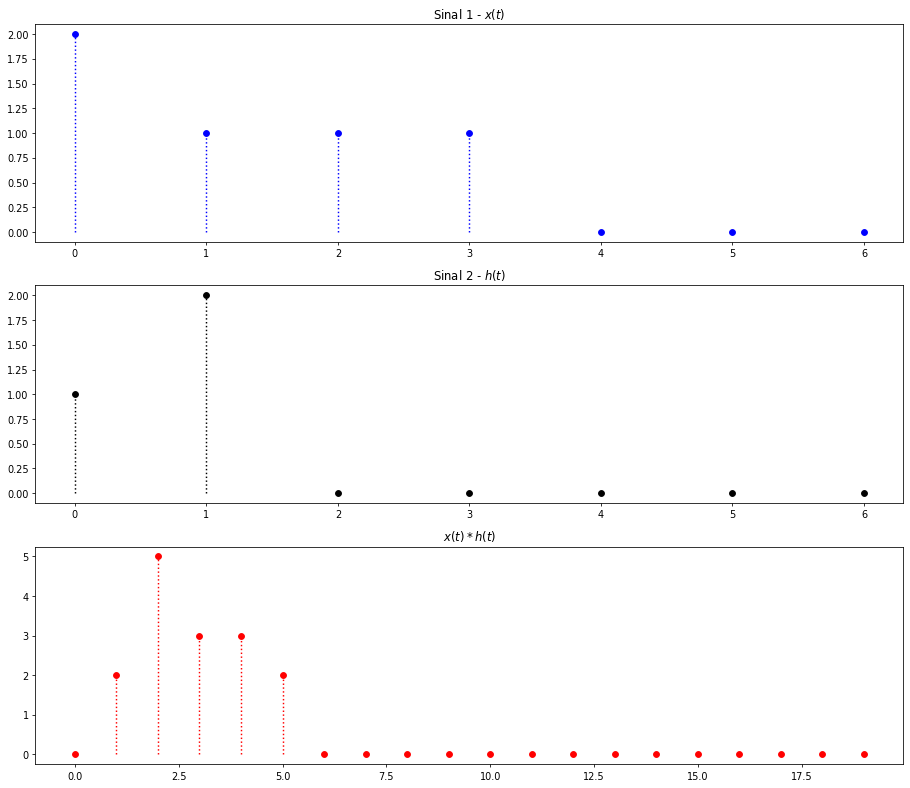

In [39]:
limite_pontos_convolucao = 20

# Inverte o segundo sinal no tempo
sinal_2_inv = inverse_time_domain(sinal_2)

# Seção do código que calcula a convolução.
y_response = []

# Define-se um número limite de pontos da convolução 
for n in range(limite_pontos_convolucao):

  # Uma lista para receber a soma das operações
  sum_response = []

  # Para cada iteração sobre o tamanho do primeiro sinal (referência)
  for i in range(len(sinal_1[0])):
  
    # Tentamos fazer o produto com o segundo sinal atrasado e invertido no tempo
    try:
      sig2_i = i - n
      sum_response.append(sinal_1[1][i]*sinal_2_inv[1][sig2_i])

    # Se isso não for possível, a convolução é zero, não há interseção
    except:
      sum_response.append(0)
  
  # Anexa essa soma para um índice dentro da resposta ao sinal
  y_response.append(sum(sum_response))

x = np.arange(0, len(y_response), 1)
y = y_response

# Plot dos gráficos
fig, ax = plt.subplots(3, figsize=(16, 14), dpi = 70)

markerline, stemlines, baseline = ax[0].stem(sinal_1[0], sinal_1[1], use_line_collection = True, linefmt = 'blue', basefmt = " ")
markerline.set_markerfacecolor('blue')
markerline.set_markeredgecolor('blue')
stemlines.set_linestyle('dotted')
ax[0].set_title("Sinal 1 - $x(t)$")

markerline, stemlines, baseline = ax[1].stem(sinal_2[0], sinal_2[1], use_line_collection = True, linefmt = 'black', basefmt = " ")
markerline.set_markerfacecolor('black')
markerline.set_markeredgecolor('black')
stemlines.set_linestyle('dotted')
ax[1].set_title("Sinal 2 - $h(t)$")

markerline, stemlines, baseline = ax[2].stem(x, y, use_line_collection = True, linefmt = 'red', basefmt = " ")
stemlines.set_linestyle('dotted')
markerline.set_markerfacecolor('red')
markerline.set_markeredgecolor('red')
ax[2].set_title("$x(t) * h(t)$")

plt.plot()


# **Convolução gráfica**

In [40]:
type(sinal3)

function

In [41]:
# Domínio de existência das funções, garanta que essa número seja menor que o limite do espaço

dominio_x_funcoes = np.arange(0, 10, 1)
limite_pontos_convolucao = 40 # Parâmetro de plotagem e iteração dos pontos da convolução

## Altere aqui o nome dos sinais utilizados nos arquivos .txt
sinal1_nome = 'sinal3'
sinal2_nome = 'sinal4'

x_sinal1 = dominio_x_funcoes
exec(f"y_sinal1 = [{sinal1_nome}(x) for x in x_sinal1]")
sinal_1 = [x_sinal1, y_sinal1]

x_sinal2 = dominio_x_funcoes
exec(f"y_sinal2 = [{sinal2_nome}(x) for x in x_sinal2]")
sinal_2 = [x_sinal2, y_sinal2]

In [42]:
# Inverte o segundo sinal no tempo
sinal_2_inv = inverse_time_domain(sinal_2)

y_response = []

# Parametro (20) que vai gerar a quantidade de pontos computados da convolução
for n in range(limite_pontos_convolucao):
    sum_response = []
  
    for i in range(n):
        try:
            sum_response.append(sinal_1[1][i]*sinal_2_inv[1][i - n])
        except:
            sum_response.append(0)

    y_response.append(sum(sum_response))


x = np.arange(0, len(y_response), 1)
y = y_response

[]

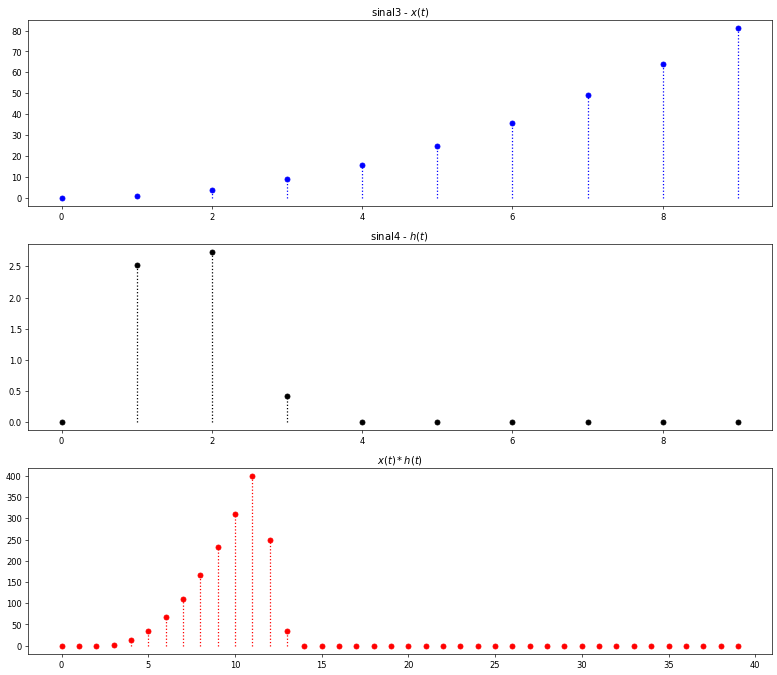

In [43]:
# Plot dos gráficos
fig, ax = plt.subplots(3, figsize=(16, 14), dpi = 60)

markerline, stemlines, baseline = ax[0].stem(sinal_1[0], sinal_1[1], use_line_collection = True, linefmt = 'blue', basefmt = " ")
markerline.set_markerfacecolor('blue')
markerline.set_markeredgecolor('blue')
stemlines.set_linestyle('dotted')
ax[0].set_title(f"{sinal1_nome} - $x(t)$")

markerline, stemlines, baseline = ax[1].stem(sinal_2[0], sinal_2[1], use_line_collection = True, linefmt = 'black', basefmt = " ")
markerline.set_markerfacecolor('black')
markerline.set_markeredgecolor('black')
stemlines.set_linestyle('dotted')
ax[1].set_title(f"{sinal2_nome} - $h(t)$")

markerline, stemlines, baseline = ax[2].stem(x, y, use_line_collection = True, linefmt = 'red', basefmt = " ")
stemlines.set_linestyle('dotted')
markerline.set_markerfacecolor('red')
markerline.set_markeredgecolor('red')
ax[2].set_title("$x(t) * h(t)$")

plt.savefig("convolution_cover.jpeg")
plt.plot()


## **Convolução gráfica**


Nesse trecho de código, a escala do gráfico da convolução perde o sentido porque os pontos não são tratados no tempo, mas sim somente na sequência numérica e ao tentar misturar ambos, a escala é multiplicada pelo limite dos intervalos dividido por cada tamanho, ou seja, é multiplicada pela razão entre a quantidade de pontos inteiros e os pontos desejados pela função.

[]

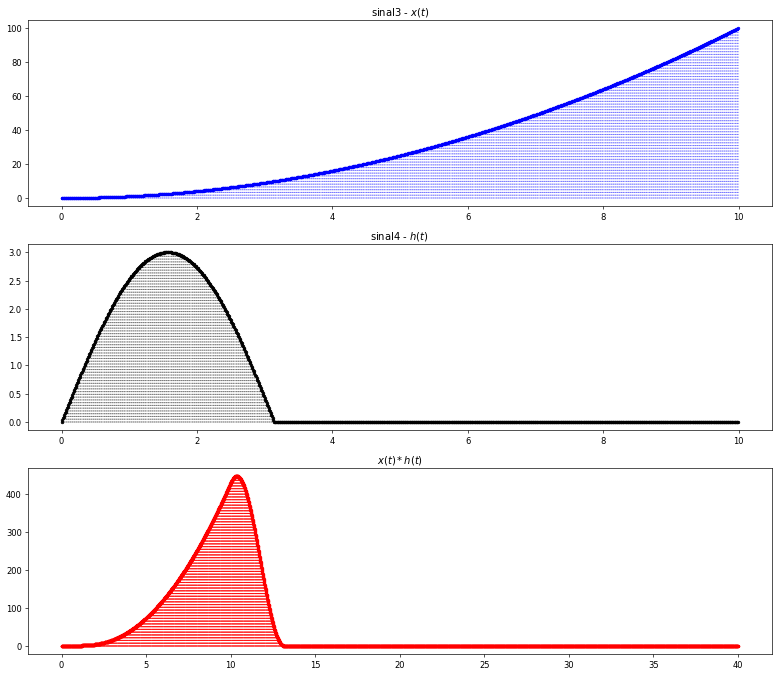

In [44]:
# Domínio de existência das funções, garanta que essa número seja menor que o limite do espaço

dominio_x_funcoes = np.arange(0, 10, 0.01)
limite_pontos_convolucao = 50 # Parâmetro de plotagem e iteração dos pontos da convolução

## Altere aqui o nome dos sinais utilizados nos arquivos .txt
sinal1_nome = 'sinal3'
sinal2_nome = 'sinal4'


x_sinal1 = dominio_x_funcoes
exec(f"y_sinal1 = [{sinal1_nome}(x) for x in x_sinal1]")
sinal_1 = [x_sinal1, y_sinal1]

x_sinal2 = dominio_x_funcoes
exec(f"y_sinal2 = [{sinal2_nome}(x) for x in x_sinal2]")
sinal_2 = [x_sinal2, y_sinal2]

# Inverte o segundo sinal no tempo
sinal_2_inv = inverse_time_domain(sinal_2)

y_response = []

# Parametro (20) que vai gerar a quantidade de pontos computados da convolução
for n in range(int(40/0.01)):
    sum_response = []
  
    for i in range(n):
        try:
            sum_response.append(sinal_1[1][i]*sinal_2_inv[1][i - n])
        except:
            sum_response.append(0)

    y_response.append(sum(sum_response) * 0.01)


x = np.arange(0, 40, 0.01)
y = y_response

# Plot dos gráficos
fig, ax = plt.subplots(3, figsize=(16, 14), dpi = 60)

markerline, stemlines, baseline = ax[0].stem(sinal_1[0], sinal_1[1], use_line_collection = True, linefmt = 'blue', basefmt = " ")
markerline.set_markerfacecolor('blue')
markerline.set_markeredgecolor('blue')
stemlines.set_linestyle('dotted')
plt.setp(stemlines, linewidth = 1.25)
plt.setp(markerline, markersize = 3)
stemlines.set_alpha(0.3)
ax[0].set_title(f"{sinal1_nome} - $x(t)$")

markerline, stemlines, baseline = ax[1].stem(sinal_2[0], sinal_2[1], use_line_collection = True, linefmt = 'black', basefmt = " ")
markerline.set_markerfacecolor('black')
markerline.set_markeredgecolor('black')
stemlines.set_linestyle('dotted')
plt.setp(stemlines, linewidth = 1.25)
plt.setp(markerline, markersize = 3)
stemlines.set_alpha(0.3)
ax[1].set_title(f"{sinal2_nome} - $h(t)$")

markerline, stemlines, baseline = ax[2].stem(x, y, use_line_collection = True, linefmt = 'red', basefmt = " ")
markerline.set_markerfacecolor('red')
markerline.set_markeredgecolor('red')
stemlines.set_linestyle('dotted')
plt.setp(stemlines, linewidth = 1.25)
plt.setp(markerline, markersize = 3)
stemlines.set_alpha(0.3)
ax[2].set_title("$x(t) * h(t)$")

plt.plot()


## Teste 2

[]

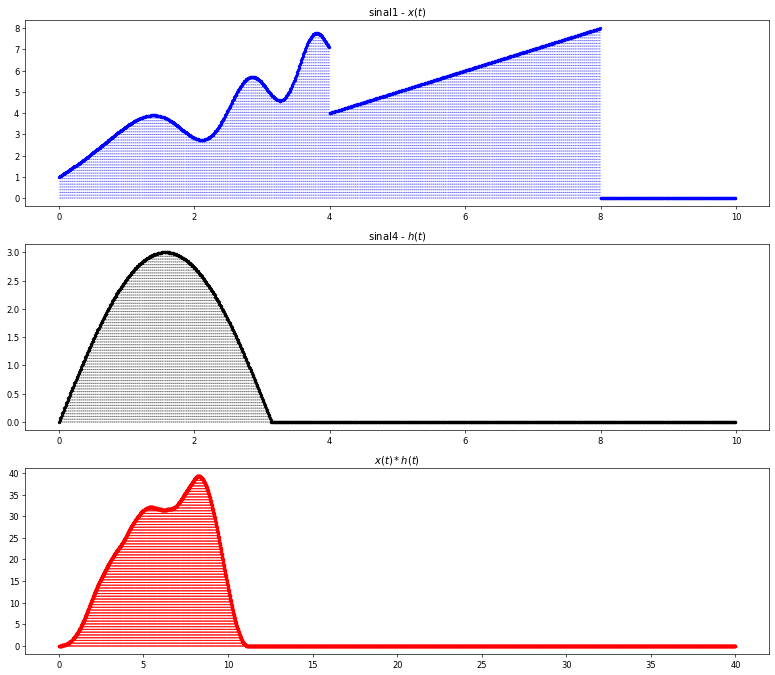

In [45]:
# Domínio de existência das funções, garanta que essa número seja menor que o limite do espaço

dominio_x_funcoes = np.arange(0, 10, 0.01)
limite_pontos_convolucao = 50 # Parâmetro de plotagem e iteração dos pontos da convolução

## Altere aqui o nome dos sinais utilizados nos arquivos .txt
sinal1_nome = 'sinal1'
sinal2_nome = 'sinal4'


x_sinal1 = dominio_x_funcoes
exec(f"y_sinal1 = [{sinal1_nome}(x) for x in x_sinal1]")
sinal_1 = [x_sinal1, y_sinal1]

x_sinal2 = dominio_x_funcoes
exec(f"y_sinal2 = [{sinal2_nome}(x) for x in x_sinal2]")
sinal_2 = [x_sinal2, y_sinal2]

# Inverte o segundo sinal no tempo
sinal_2_inv = inverse_time_domain(sinal_2)

y_response = []

# Parametro (20) que vai gerar a quantidade de pontos computados da convolução
for n in range(int(40/0.01)):
    sum_response = []
  
    for i in range(n):
        try:
            sum_response.append(sinal_1[1][i]*sinal_2_inv[1][i - n])
        except:
            sum_response.append(0)

    y_response.append(sum(sum_response) * 0.01)


x = np.arange(0, 40, 0.01)
y = y_response

# Plot dos gráficos
fig, ax = plt.subplots(3, figsize=(16, 14), dpi = 60)

markerline, stemlines, baseline = ax[0].stem(sinal_1[0], sinal_1[1], use_line_collection = True, linefmt = 'blue', basefmt = " ")
markerline.set_markerfacecolor('blue')
markerline.set_markeredgecolor('blue')
stemlines.set_linestyle('dotted')
plt.setp(stemlines, linewidth = 1.25)
plt.setp(markerline, markersize = 3)
stemlines.set_alpha(0.3)
ax[0].set_title(f"{sinal1_nome} - $x(t)$")

markerline, stemlines, baseline = ax[1].stem(sinal_2[0], sinal_2[1], use_line_collection = True, linefmt = 'black', basefmt = " ")
markerline.set_markerfacecolor('black')
markerline.set_markeredgecolor('black')
stemlines.set_linestyle('dotted')
plt.setp(stemlines, linewidth = 1.25)
plt.setp(markerline, markersize = 3)
stemlines.set_alpha(0.3)
ax[1].set_title(f"{sinal2_nome} - $h(t)$")

markerline, stemlines, baseline = ax[2].stem(x, y, use_line_collection = True, linefmt = 'red', basefmt = " ")
markerline.set_markerfacecolor('red')
markerline.set_markeredgecolor('red')
stemlines.set_linestyle('dotted')
plt.setp(stemlines, linewidth = 1.25)
plt.setp(markerline, markersize = 3)
stemlines.set_alpha(0.3)
ax[2].set_title("$x(t) * h(t)$")

plt.plot()


[]

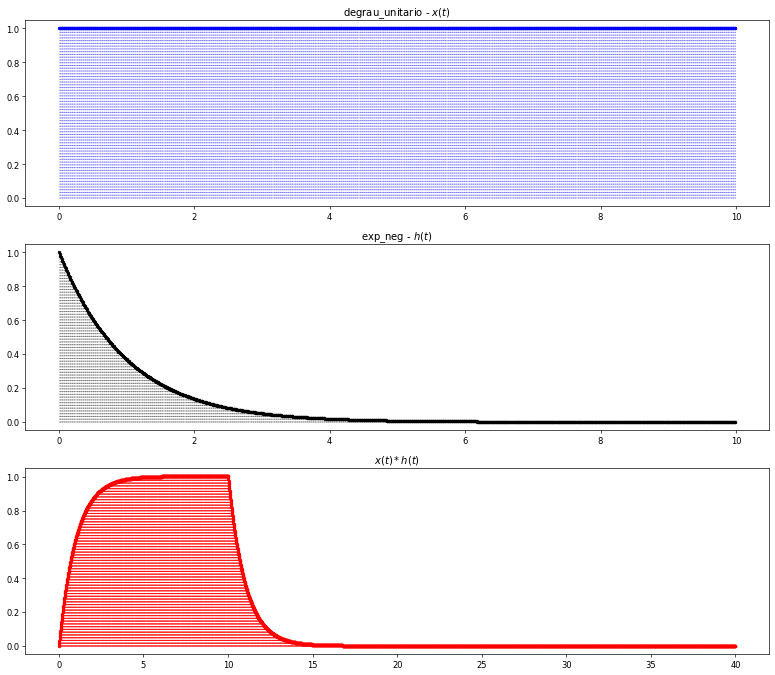

In [46]:
# Domínio de existência das funções, garanta que essa número seja menor que o limite do espaço

dominio_x_funcoes = np.arange(0, 10, 0.01)
limite_pontos_convolucao = 50 # Parâmetro de plotagem e iteração dos pontos da convolução

## Altere aqui o nome dos sinais utilizados nos arquivos .txt
sinal1_nome = 'degrau_unitario'
sinal2_nome = 'exp_neg'


x_sinal1 = dominio_x_funcoes
exec(f"y_sinal1 = [{sinal1_nome}(x) for x in x_sinal1]")
sinal_1 = [x_sinal1, y_sinal1]

x_sinal2 = dominio_x_funcoes
exec(f"y_sinal2 = [{sinal2_nome}(x) for x in x_sinal2]")
sinal_2 = [x_sinal2, y_sinal2]

# Inverte o segundo sinal no tempo
sinal_2_inv = inverse_time_domain(sinal_2)

y_response = []

# Parametro (20) que vai gerar a quantidade de pontos computados da convolução
for n in range(int(40/0.01)):
    sum_response = []
  
    for i in range(n):
        try:
            sum_response.append(sinal_1[1][i]*sinal_2_inv[1][i - n])
        except:
            sum_response.append(0)

    y_response.append(sum(sum_response) * 0.01)


x = np.arange(0, 40, 0.01)
y = y_response

# Plot dos gráficos
fig, ax = plt.subplots(3, figsize=(16, 14), dpi = 60)

markerline, stemlines, baseline = ax[0].stem(sinal_1[0], sinal_1[1], use_line_collection = True, linefmt = 'blue', basefmt = " ")
markerline.set_markerfacecolor('blue')
markerline.set_markeredgecolor('blue')
stemlines.set_linestyle('dotted')
plt.setp(stemlines, linewidth = 1.25)
plt.setp(markerline, markersize = 3)
stemlines.set_alpha(0.3)
ax[0].set_title(f"{sinal1_nome} - $x(t)$")

markerline, stemlines, baseline = ax[1].stem(sinal_2[0], sinal_2[1], use_line_collection = True, linefmt = 'black', basefmt = " ")
markerline.set_markerfacecolor('black')
markerline.set_markeredgecolor('black')
stemlines.set_linestyle('dotted')
plt.setp(stemlines, linewidth = 1.25)
plt.setp(markerline, markersize = 3)
stemlines.set_alpha(0.3)
ax[1].set_title(f"{sinal2_nome} - $h(t)$")

markerline, stemlines, baseline = ax[2].stem(x, y, use_line_collection = True, linefmt = 'red', basefmt = " ")
markerline.set_markerfacecolor('red')
markerline.set_markeredgecolor('red')
stemlines.set_linestyle('dotted')
plt.setp(stemlines, linewidth = 1.25)
plt.setp(markerline, markersize = 3)
stemlines.set_alpha(0.3)
ax[2].set_title("$x(t) * h(t)$")

plt.plot()
